In [1]:
import pandas as pd
import numpy as np
import yfinance as yf 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
plt.style.use('fivethirtyeight')
import pytz
from datetime import datetime

In [2]:
x=int(input('Please choose company stock ticker to analyze: (1.Apple, 2.Facebook, 3.Google, 4.Amazon, 5.Tesla'))
if x==1:
  ticker='AAPL'
elif x==2:
  ticker='FB'
elif x==3:
  ticker='GOOGL'
elif x==4:
  ticker='AMZN'
elif x==5:
  ticker='TSLA'
else:
  print('Sorry, Please enter a number from the list')
print(f'The ticker you chose is: {ticker}')

Please choose company stock ticker to analyze: (1.Apple, 2.Facebook, 3.Google, 4.Amazon, 5.Tesla1
The ticker you chose is: AAPL


In [3]:
#Get the stock quote
df=yf.download({ticker}, start="2015-01-01", period="ytd")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.603207,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.910097,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.912344,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.247644,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.179300,237458000
...,...,...,...,...,...,...
2022-11-16,149.130005,149.869995,147.289993,148.789993,148.789993,64218300
2022-11-17,146.429993,151.479996,146.149994,150.720001,150.720001,80389400
2022-11-18,152.309998,152.699997,149.970001,151.289993,151.289993,74794600


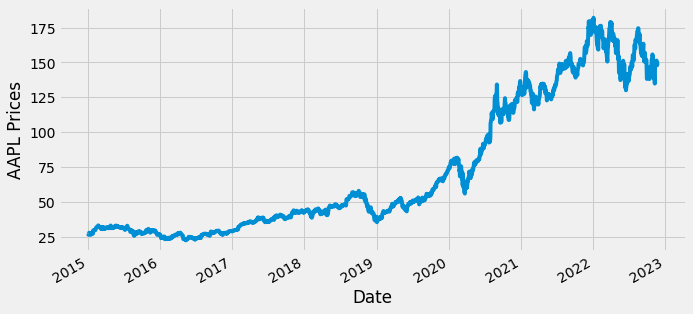

In [4]:
#Keep only the close data
df=df[['Close']]
df=df.dropna()
df.Close.plot(figsize=(10,5)) 
plt.ylabel("AAPL Prices")
plt.show()

In [5]:
df['S_3'] = df['Close'].shift(1).rolling(window=3).mean() 
df['S_9']= df['Close'].shift(1).rolling(window=9).mean() 
df= df.dropna() 
X = df[['S_3','S_9']] 
X.head()


,S_3,S_9
Date,,
2015-01-15,27.439167,27.298889
2015-01-16,27.236667,27.229167
2015-01-20,26.884167,27.221945
2015-01-21,26.794167,27.290278
2015-01-22,27.021667,27.340278


In [6]:
y = df['Close']
y.head()

Date
2015-01-15    26.705000
2015-01-16    26.497499
2015-01-20    27.180000
2015-01-21    27.387501
2015-01-22    28.100000
Name: Close, dtype: float64

In [7]:
#Split the data into train and test dataset
t=.8 
t = int(t*len(df)) 
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
y_test = y[t:]

In [8]:
#Create a linear regression model and fit the data
linear = LinearRegression().fit(X_train,y_train)


In [9]:
X_test

,S_3,S_9
Date,,
2021-04-30,133.816666,133.764445
2021-05-03,132.840001,133.388891
2021-05-04,132.493332,133.325556
2021-05-05,130.616666,132.697778
2021-05-06,129.496666,132.271112
...,...,...
2022-11-16,149.339996,142.826665
2022-11-17,149.036662,143.927775
2022-11-18,149.849996,145.298886


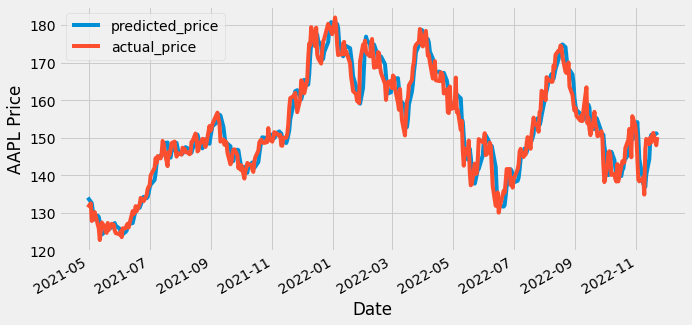

In [10]:
#Prediction using test data
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  
y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("AAPL Price")  
plt.show()

In [11]:
#show the scores for test and train data predictions
#training_score=model.score(x_train, y_train)
from sklearn.metrics import r2_score
r2_score(y_test,predicted_price)

0.9368288364385268

In [12]:
df=df.reset_index()
df

,Date,Close,S_3,S_9
0,2015-01-15,26.705000,27.439167,27.298889
1,2015-01-16,26.497499,27.236667,27.229167
2,2015-01-20,27.180000,26.884167,27.221945
3,2015-01-21,27.387501,26.794167,27.290278
4,2015-01-22,28.100000,27.021667,27.340278
...,...,...,...,...
1974,2022-11-16,148.789993,149.339996,142.826665
1975,2022-11-17,150.720001,149.036662,143.927775
1976,2022-11-18,151.289993,149.849996,145.298886
1977,2022-11-21,148.009995,150.266663,146.673330


In [13]:
useast = datetime.now(pytz.timezone('America/New_York'))
useast = useast.strftime('%Y-%m-%d')
useast = datetime.strptime(useast, '%Y-%m-%d')

In [14]:
#add a dummy row for prediction
df.loc[len(df)]=df.loc[len(df)-1]
next_day = useast+timedelta(1)
df.iloc[-1, df.columns.get_loc('Date')] = next_day
df['Date'] = pd.to_datetime(df["Date"], utc="True").dt.date

In [15]:
df.tail()

,Date,Close,S_3,S_9
1975,2022-11-17,150.720001,149.036662,143.927775
1976,2022-11-18,151.289993,149.849996,145.298886
1977,2022-11-21,148.009995,150.266663,146.673330
1978,2022-11-22,150.179993,150.006663,147.618885
1979,2022-11-23,150.179993,150.006663,147.618885


In [16]:
df = df.set_index('Date')

In [17]:
x_today=df.iloc[-1:]
x_today=x_today[['S_3','S_9']]
x_today

,S_3,S_9
Date,,
2022-11-23,150.006663,147.618885


In [18]:
#predict tomorrows price
new_price = linear.predict(x_today)
new_price

array([150.70603904])